In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()

Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

In [5]:
train = data_train.loc[:,["Open"]].values
print(train) #converting into a NumPy array

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [8]:
# Feature Scaling (0 to 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [9]:
# create a data structure with 50 timesteps and 1 output; x-train - input and y_train output seq

x_train = []
y_train = []
timesteps = 5

for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshaping

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(y_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
[0.0643277  0.0585423  0.06568569 ... 0.95725128 0.93796041 0.93688146]


In [12]:
# Create RNN Model

# Importing the Keras Libraries and packages
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# initialisinig the RNN
regressor = Sequential()

# adding the first RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))

# adding the second RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))

# adding the third RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))

# adding the fourth RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100))

# Adding output Layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 50, batch_size = 1)

Epoch 1/50


C:\Users\yashy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1253/1253 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0069
Epoch 2/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0012
Epoch 3/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0012
Epoch 4/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.4658e-04
Epoch 5/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.0476e-04
Epoch 6/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.8031e-04
Epoch 7/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.6367e-04
Epoch 8/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.2409e-04
Epoch 9/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.0029e-04
Epoch 10/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0019
Epoch 11/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.0396e-04
Epoch 12/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.0108e-04
Epoch 13/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.2342e-04
Epoch 14/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.0679e-04


In [13]:
# Getting the real stock price of 2017

data_test = pd.read_csv("Google_Stock_Price_Test.csv")
data_test.head()

Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400

In [14]:
real_stock_price = data_test.loc[:, ["Open"]].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [15]:
# Getting the predicted stock price of 2017

data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) # min max scaler
inputs

array([[0.95204256],
       [0.95163331],
       [0.95725128],
       [0.93796041],
       [0.93688146],
       [0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


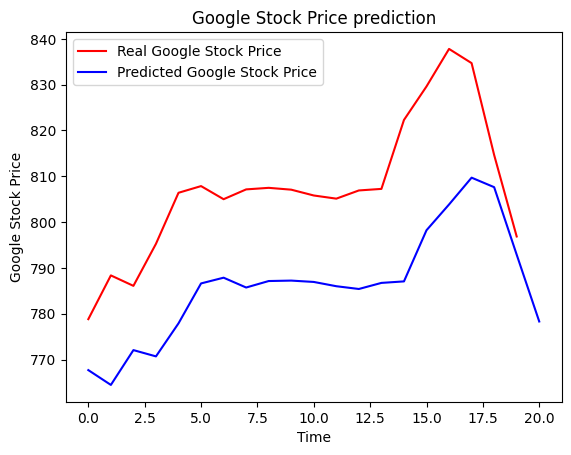

In [16]:
x_test = []
for i in range(timesteps, 70):
    if len(inputs[i-timesteps:i, 0]) == timesteps:
        x_test.append(inputs[i-timesteps:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicte_stock_price = regressor.predict(x_test)
predicte_stock_price = scaler.inverse_transform(predicte_stock_price)

# visualising the results
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicte_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()